## Observation from First network :From First or Vanila network I made a note that 
- 13,452 parameters gave 0.9881 accuracy with batch size 32 and  epochs 10 , trained more no of time but acuracy did not grow much which led to apply another concepts 

** please note as in first network i added comments in per block , here skipping:(

###TRY in this network 

###1.   Decrease no of kernals 
###2.   Increase batch size 
###3.   Receptive Field check and verified Maxpool should be at right layer



## Improvment from First Network : 10, 298 parameters(less from first network)  and in 30 epochs achieved 9919  val accuracy

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


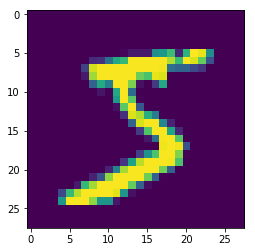

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', name ='FirstLayer', input_shape=(28,28,1))) # RF 3x3
model.add(Convolution2D(12, 3, 3, activation='relu' ,name ='SecondLayer')) # RF 5x5
model.add(Convolution2D(16, 3, 3, activation='relu' , name ='ThirdLayer')) # RF 7x7
model.add(MaxPooling2D(pool_size=(2, 2))) # RF 14x14

model.add(Convolution2D(10, 3, activation='relu'))# RF 16x16
model.add(Convolution2D(12, 3, 3, activation='relu' , name ='fourthThirdLayer'))
model.add(Convolution2D(16, 3, 3, activation='relu' , name ='FifthLayer'))
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SixthLayer'))
model.add(Convolution2D(16, 3, 3, activation='relu' , name ='SeventhLayer'))

model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="FirstLayer", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="SecondLayer")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="ThirdLayer")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="fourthThirdLayer")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="r

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstLayer (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
SecondLayer (Conv2D)         (None, 24, 24, 12)        1092      
_________________________________________________________________
ThirdLayer (Conv2D)          (None, 22, 22, 16)        1744      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 9, 9, 10)          1450      
_________________________________________________________________
fourthThirdLayer (Conv2D)    (None, 7, 7, 12)          1092      
_________________________________________________________________
FifthLayer (Conv2D)          (None, 5, 5, 16)          1744      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## First run - got 0.9881 evalution accuracy  with 10 epochs

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.3004 - acc: 0.9033 - val_loss: 0.0909 - val_acc: 0.9718
Epoch 2/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0896 - acc: 0.9726 - val_loss: 0.0625 - val_acc: 0.9799
Epoch 3/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0677 - acc: 0.9791 - val_loss: 0.0548 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0568 - acc: 0.9825 - val_loss: 0.0509 - val_acc: 0.9847
Epoch 5/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0619 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0429 - acc: 0.9870 - val_loss: 0.0460 - val_acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0397 - acc: 0.9878 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

## As Decreased parameters from first network , now running few more time epochs to see if less no of parameters learn more features and increase val acuracy -- and achieved 0.9919 val accuracy

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20,validation_data=(X_test,Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  800/60000 [..............................] - ETA: 13s - loss: 0.0294 - acc: 0.9888

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 216us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0319 - val_acc: 0.9896
Epoch 2/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0273 - acc: 0.9916 - val_loss: 0.0339 - val_acc: 0.9897
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0334 - val_acc: 0.9886
Epoch 4/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0471 - val_acc: 0.9873
Epoch 5/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0252 - acc: 0.9925 - val_loss: 0.0347 - val_acc: 0.9901
Epoch 6/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0361 - val_acc: 0.9897
Epoch 7/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0408 - val_acc: 0.9891
Epoch 8/20
60000/60000 [==============

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=100,validation_data=(X_test,Y_test), verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()